# Importando bibliotecas

In [1]:
import zipfile  # extrair o zip
from io import BytesIO  # reconhecer numeros binarios e converter
from PIL import Image
import matplotlib.pyplot as plt  # plotar graficos
import os  # SO do computador
import shutil  # para manipulação de arquivos e diretorios
import pandas as pd
from sklearn.preprocessing import StandardScaler  # padronizar os dados
import tensorflow as tf
import numpy as np
import matplotlib.image as mpimg
import random
from sklearn.model_selection import train_test_split


# Diretórios

In [9]:


for dirname, _, filenames in os.walk(
    r"C:\Users\ytalo\Downloads\dataset_Libras\30 FPS\30 FPS\train"
):
    for filename in filenames:
        print(os.path.join(dirname, filename))


bus_dir = r"C:\Users\ytalo\Downloads\dataset_Libras\30 FPS\30 FPS\train\bus_renamed"
bank_dir = r"C:\Users\ytalo\Downloads\dataset_Libras\30 FPS\30 FPS\train\bank_renamed"
car_dir = r"C:\Users\ytalo\Downloads\dataset_Libras\30 FPS\30 FPS\train\car_renamed"
formation_dir = r"C:\Users\ytalo\Downloads\dataset_Libras\30 FPS\30 FPS\train\formation_renamed"
hospital_dir = r"C:\Users\ytalo\Downloads\dataset_Libras\30 FPS\30 FPS\train\hospital_renamed"
I_dir = r"C:\Users\ytalo\Downloads\dataset_Libras\30 FPS\30 FPS\train\I_renamed"
man_dir = r"C:\Users\ytalo\Downloads\dataset_Libras\30 FPS\30 FPS\train\man_renamed"
motorcycle_dir = r"C:\Users\ytalo\Downloads\dataset_Libras\30 FPS\30 FPS\train\motorcycle_renamed"
my_dir = r"C:\Users\ytalo\Downloads\dataset_Libras\30 FPS\30 FPS\train\my_renamed"
supermarket_dir = r"C:\Users\ytalo\Downloads\dataset_Libras\30 FPS\30 FPS\train\supermarket_renamed"
we_dir = r"C:\Users\ytalo\Downloads\dataset_Libras\30 FPS\30 FPS\train\we_renamed"
woman_dir = r"C:\Users\ytalo\Downloads\dataset_Libras\30 FPS\30 FPS\train\woman_renamed"
you_dir = r"C:\Users\ytalo\Downloads\dataset_Libras\30 FPS\30 FPS\train\you_renamed"
youPlural_dir = r"C:\Users\ytalo\Downloads\dataset_Libras\30 FPS\30 FPS\train\you (plural)_renamed"
your_dir = r"C:\Users\ytalo\Downloads\dataset_Libras\30 FPS\30 FPS\train\your_renamed"


bus_image = os.listdir(bus_dir)
bank_image = os.listdir(bank_dir)
car_image = os.listdir(car_dir)
formation_image = os.listdir(formation_dir)
hospital_image = os.listdir(hospital_dir)
I_image = os.listdir(I_dir)
man_image = os.listdir(man_dir)
motorcycle_image = os.listdir(motorcycle_dir)
my_image =os.listdir(my_dir)
supermarket_image=os.listdir(supermarket_dir)
we_image=os.listdir(we_dir)
woman_image=os.listdir(woman_dir)
you_image=os.listdir(you_dir)
youPlural_image=os.listdir(youPlural_dir)
your_image=os.listdir(your_dir)



C:\Users\ytalo\Downloads\dataset_Libras\30 FPS\30 FPS\train\bank\bank_1605967420.8409734
C:\Users\ytalo\Downloads\dataset_Libras\30 FPS\30 FPS\train\bank\bank_1605967420.8409889
C:\Users\ytalo\Downloads\dataset_Libras\30 FPS\30 FPS\train\bank\bank_1605967420.8410015
C:\Users\ytalo\Downloads\dataset_Libras\30 FPS\30 FPS\train\bank\bank_1605967420.8410125
C:\Users\ytalo\Downloads\dataset_Libras\30 FPS\30 FPS\train\bank\bank_1605967420.8410249
C:\Users\ytalo\Downloads\dataset_Libras\30 FPS\30 FPS\train\bank\bank_1605967420.841037
C:\Users\ytalo\Downloads\dataset_Libras\30 FPS\30 FPS\train\bank\bank_1605967420.841048
C:\Users\ytalo\Downloads\dataset_Libras\30 FPS\30 FPS\train\bank\bank_1605967420.8410597
C:\Users\ytalo\Downloads\dataset_Libras\30 FPS\30 FPS\train\bank\bank_1605967420.8410692
C:\Users\ytalo\Downloads\dataset_Libras\30 FPS\30 FPS\train\bank\bank_1605967420.8410807
C:\Users\ytalo\Downloads\dataset_Libras\30 FPS\30 FPS\train\bank\bank_1605967420.8410923
C:\Users\ytalo\Download

# Total de imagens em cada diretório

In [10]:
len(bus_image),len(bank_image),len(car_image),len(formation_image), len(hospital_image), len(I_image), len(man_image), len(motorcycle_image),len(my_image), len(supermarket_image), len(we_image), len(woman_image), len(you_image), len(youPlural_image), len(your_image)


(268, 220, 252, 4320, 219, 150, 178, 259, 187, 267, 288, 166, 203, 241, 504)

# Making train val split 

In [12]:

# Making train val split (bank SIGN)
train_bank_image = bank_image[: int(0.8 * len(bank_image))]
val_bank_image = bank_image[int(0.8 * len(bank_image)) :]


# Making train val split (BUS SIGN)
train_bus_image = bus_image[: int(0.8 * len(bus_image))]
val_bus_image = bus_image[int(0.8 * len(bus_image)) :]

# Making train val split (car SIGN)
train_car_image = car_image[: int(0.8 * len(car_image))]
val_car_image = car_image[int(0.8 * len(car_image)) :]

# Making train val split (car SIGN)
train_formation_image = formation_image[: int(0.8 * len(formation_image))]
val_formation_image = formation_image[int(0.8 * len(formation_image)) :]

# Making train val split (hospital SIGN)
train_hospital_image = hospital_image[: int(0.8 * len(hospital_image))]
val_hospital_image = hospital_image[int(0.8 * len(hospital_image)) :]

# Making train val split (I SIGN)
train_I_image = I_image[: int(0.8 * len(I_image))]
val_I_image = I_image[int(0.8 * len(I_image)) :]

# Making train val split (man SIGN)
train_man_image = man_image[: int(0.8 * len(man_image))]
val_man_image = man_image[int(0.8 * len(man_image)) :]

# Making train val split (motorcycle SIGN)
train_motorcycle_image = motorcycle_image[: int(0.8 * len(motorcycle_image))]
val_motorcycle_image = motorcycle_image[int(0.8 * len(motorcycle_image)) :]

# Making train val split (my SIGN)
train_my_image = my_image[: int(0.8 * len(my_image))]
val_my_image = my_image[int(0.8 * len(my_image)) :]

# Making train val split (supermarket SIGN)
train_supermarket_image = supermarket_image[: int(0.8 * len(supermarket_image))]
val_supermarket_image = supermarket_image[int(0.8 * len(supermarket_image)) :]


# Making train val split (we SIGN)
train_we_image = we_image[: int(0.8 * len(we_image))]
val_we_image = we_image[int(0.8 * len(we_image)) :]


# Making train val split (woman SIGN)
train_woman_image = woman_image[: int(0.8 * len(woman_image))]
val_woman_image = woman_image[int(0.8 * len(woman_image)) :]

# Making train val split (you SIGN)
train_you_image = you_image[: int(0.8 * len(you_image))]
val_you_image = you_image[int(0.8 * len(you_image)) :]

# Making train val split (youPlural SIGN)
train_youPlural_image = youPlural_image[: int(0.8 * len(youPlural_image))]
val_youPlural_image = youPlural_image[int(0.8 * len(youPlural_image)) :]


# Making train val split (your SIGN)
train_your_image = your_image[: int(0.8 * len(your_image))]
val_your_image = your_image[int(0.8 * len(your_image)) :]


train_dir = r"C:\Users\ytalo\Downloads\dataset_Libras\30 FPS\30 FPS\train"
val_dir = r"C:\Users\ytalo\Downloads\dataset_Libras\validation\validation"


# Create directories 

In [13]:

# Create directories (BUS)
os.makedirs(train_dir + "/bus_renamed", exist_ok=True)
os.makedirs(val_dir + "/bus_renamed", exist_ok=True)

# Create directories (bank)
os.makedirs(train_dir + "/bank_renamed", exist_ok=True)
os.makedirs(val_dir + "/bank_renamed", exist_ok=True)

# Create directories (car)
os.makedirs(train_dir + "/car_renamed", exist_ok=True)
os.makedirs(val_dir + "/car_renamed", exist_ok=True)

# Create directories (car)
os.makedirs(train_dir + "/formation_renamed", exist_ok=True)
os.makedirs(val_dir + "/formation_renamed", exist_ok=True)

# Create directories (hospital)
os.makedirs(train_dir + "/hospital_renamed", exist_ok=True)
os.makedirs(val_dir + "/hospital_renamed", exist_ok=True)

# Create directories (I)
os.makedirs(train_dir + "/I_renamed", exist_ok=True)
os.makedirs(val_dir + "/I_renamed", exist_ok=True)

# Create directories (I)
os.makedirs(train_dir + "/man_renamed", exist_ok=True)
os.makedirs(val_dir + "/man_renamed", exist_ok=True)

# Create directories (motorcycle)
os.makedirs(train_dir + "/motorcycle_renamed", exist_ok=True)
os.makedirs(val_dir + "/motorcycle_renamed", exist_ok=True)

# Create directories (my)
os.makedirs(train_dir + "/my_renamed", exist_ok=True)
os.makedirs(val_dir + "/my_renamed", exist_ok=True)

# Create directories (supermarket)
os.makedirs(train_dir + "/supermarket_renamed", exist_ok=True)
os.makedirs(val_dir + "/supermarket_renamed", exist_ok=True)

# Create directories (we)
os.makedirs(train_dir + "/we_renamed", exist_ok=True)
os.makedirs(val_dir + "/we_renamed", exist_ok=True)

# Create directories (woman)
os.makedirs(train_dir + "/woman_renamed", exist_ok=True)
os.makedirs(val_dir + "/woman_renamed", exist_ok=True)

# Create directories (you)
os.makedirs(train_dir + "/you_renamed", exist_ok=True)
os.makedirs(val_dir + "/you_renamed", exist_ok=True)

# Create directories (youPlural)
os.makedirs(train_dir + "/you (plural)_renamed", exist_ok=True)
os.makedirs(val_dir + "/you (plural)_renamed", exist_ok=True)

# Create directories (your)
os.makedirs(train_dir + "/your_renamed", exist_ok=True)
os.makedirs(val_dir + "/your_renamed", exist_ok=True)


# Copy images to train directory

In [18]:

# Copy images to train directory (bank)
for image in train_bank_image:
    src = bank_dir + "/" + image
    dst = train_dir + "/bank_renamed"
    try:
        shutil.copy2(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (bank)
for image in val_bank_image:
    src = bank_dir + "/" + image
    dst = val_dir + "/bank_renamed"
    try:
        shutil.copy2(src, dst)
    except shutil.SameFileError:
        pass

# Copy images to train directory (bus)
for image in train_bus_image:
    src = bus_dir + "/" + image
    dst = train_dir + "/bus_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (bus)
for image in val_bus_image:
    src = bus_dir + "/" + image
    dst = val_dir + "/bus_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy images to train directory (car)
for image in train_car_image:
    src = car_dir + "/" + image
    dst = train_dir + "/car_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (car)
for image in val_car_image:
    src = car_dir + "/" + image
    dst = val_dir + "/car_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

    # Copy images to train directory (formation)
for image in train_formation_image:
    src = formation_dir + "/" + image
    dst = train_dir + "/formation_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (formation)
for image in val_formation_image:
    src = formation_dir + "/" + image
    dst = val_dir + "/formation_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

        # Copy images to train directory (hospital)
for image in train_hospital_image:
    src = hospital_dir + "/" + image
    dst = train_dir + "/hospital_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (hospital)
for image in val_hospital_image:
    src = hospital_dir + "/" + image
    dst = val_dir + "/hospital_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

        # Copy images to train directory (I)
for image in train_I_image:
    src = I_dir + "/" + image
    dst = train_dir + "/I_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (I)
for image in val_I_image:
    src = I_dir + "/" + image
    dst = val_dir + "/I_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

        # Copy images to train directory (man)
for image in train_man_image:
    src = man_dir + "/" + image
    dst = train_dir + "/man_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (man)
for image in val_man_image:
    src = man_dir + "/" + image
    dst = val_dir + "/man_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

        # Copy images to train directory (motorcycle)
for image in train_motorcycle_image:
    src = motorcycle_dir + "/" + image
    dst = train_dir + "/motorcycle_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (motorcycle)
for image in val_motorcycle_image:
    src = motorcycle_dir + "/" + image
    dst = val_dir + "/motorcycle_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass
    
            # Copy images to train directory (my)
for image in train_my_image:
    src = my_dir + "/" + image
    dst = train_dir + "/my_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (my)    
for image in val_my_image:
    src = my_dir + "/" + image
    dst = val_dir + "/my_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

    
            # Copy images to train directory (supermarket)
for image in train_supermarket_image:
    src = supermarket_dir + "/" + image
    dst = train_dir + "/supermarket_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (supermarket)    
for image in val_supermarket_image:
    src = supermarket_dir + "/" + image
    dst = val_dir + "/supermarket_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

    
            # Copy images to train directory (we)
for image in train_we_image:
    src = we_dir + "/" + image
    dst = train_dir + "/we_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (we)    
for image in val_we_image:
    src = we_dir + "/" + image
    dst = val_dir + "/we_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass
    
      
            # Copy images to train directory (woman)
for image in train_woman_image:
    src = woman_dir + "/" + image
    dst = train_dir + "/woman_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (woman)    
for image in val_woman_image:
    src = woman_dir + "/" + image
    dst = val_dir + "/woman_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass
    
     # Copy images to train directory (you)
for image in train_you_image:
    src = you_dir + "/" + image
    dst = train_dir + "/you_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (you)    
for image in val_you_image:
    src = you_dir + "/" + image
    dst = val_dir + "/you_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass


     # Copy images to train directory (youPlural)
for image in train_youPlural_image:
    src = youPlural_dir + "/" + image
    dst = train_dir + "/you (plural)_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (youPlural)    
for image in val_youPlural_image:
    src = youPlural_dir + "/" + image
    dst = val_dir + "/you (plural)_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass
    
         # Copy images to train directory (your)
for image in train_your_image:
    src = your_dir + "/" + image
    dst = train_dir + "/your_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (your)    
for image in val_your_image:
    src = your_dir + "/" + image
    dst = val_dir + "/your_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Plot Image 

(1280, 720, 3)


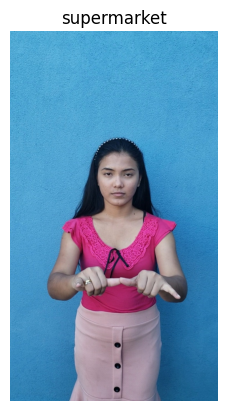

(1280, 720, 3)


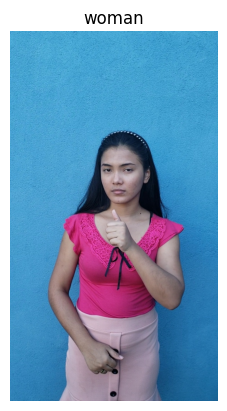

(1280, 720, 3)


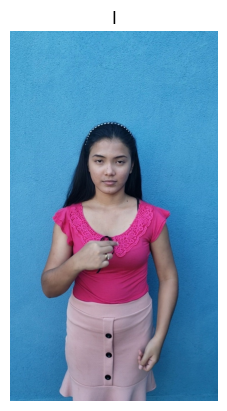

In [19]:
# Track displayed images
displayed_images = set()

def view_random_image(target_folder, title):
    global displayed_images
    random_image = random.choice(os.listdir(target_folder))

    # Ensure the selected image hasn't been displayed before
    while random_image in displayed_images:
        random_image = random.choice(os.listdir(target_folder))

    displayed_images.add(random_image)

    img = mpimg.imread(os.path.join(target_folder, random_image))
    print(img.shape)
    plt.title(title)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Call the function for at least three different categories
view_random_image(supermarket_dir, "supermarket")
view_random_image(woman_dir, "woman")
view_random_image(I_dir, "I")








In [14]:

train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1 / 255.0)
val_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1 / 255.0)

train_dataset = train_data_gen.flow_from_directory(
    train_dir, target_size=(227, 227), class_mode="categorical"
)

val_dataset = val_data_gen.flow_from_directory(
    val_dir, target_size=(227, 227), class_mode="categorical"
)


Found 7722 images belonging to 30 classes.
Found 3767 images belonging to 30 classes.


In [21]:
train_dataset_onhot = pd.get_dummies(train_dataset, dtype='float32').values


MemoryError: Unable to allocate 18.9 MiB for an array with shape (32, 227, 227, 3) and data type float32

In [57]:
import tensorflow as tf

# Supondo que o tamanho da entrada seja 16
input_shape = (1280, 720, 3)

model = tf.keras.Sequential()

# Adiciona a camada oculta
model.add(tf.keras.layers.Dense(64, input_dim=16, activation='sigmoid', name='oculta'))

# Adiciona a camada de saída
model.add(tf.keras.layers.Dense(1, activation='relu', name='saida'))

# Mostra um resumo do modelo
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 oculta (Dense)              (None, 64)                1088      
                                                                 
 saida (Dense)               (None, 1)                 65        
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 oculta (Dense)              (None, 64)                1088      
                                                                 
 saida (Dense)               (None, 1)                 65        
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=opt, metrics=['mse'])

In [118]:
# Separating into different datasets based on 'Third_to_last_folder'
test_dataset = df_file_info[df_file_info['T/T/V'] == 'test']

# Displaying the DataFrames
print("Test Dataset:")
print(test_dataset)

Test Dataset:
     T/T/V Label                     File
0     test     I      I_1605967125.294393
1     test     I     I_1605967125.2944071
2     test     I      I_1605967125.294418
3     test     I     I_1605967125.2944283
4     test     I     I_1605967125.2944384
...    ...   ...                      ...
1840  test  your  your_1605967125.2895226
1841  test  your   your_1605967125.289536
1842  test  your  your_1605967125.2895467
1843  test  your  your_1605967125.2895591
1844  test  your  your_1605967125.2895713

[1845 rows x 3 columns]


In [119]:
train_dataset = df_file_info[df_file_info['T/T/V'] == 'train']
validation_dataset = df_file_info[df_file_info['T/T/V'] == 'validation']

# Displaying the DataFrames
print("Train Dataset:")
print(train_dataset)
print("\nValidation Dataset:")
print(validation_dataset)

Train Dataset:
      T/T/V Label                     File
1845  train     I     I_1605967420.9372084
1846  train     I     I_1605967420.9372222
1847  train     I     I_1605967420.9372318
1848  train     I     I_1605967420.9372416
1849  train     I     I_1605967420.9372516
...     ...   ...                      ...
9226  train  your  your_1605967420.9122114
9227  train  your  your_1605967420.9122274
9228  train  your  your_1605967420.9122422
9229  train  your  your_1605967420.9122605
9230  train  your  your_1605967420.9122758

[7386 rows x 3 columns]

Validation Dataset:
            T/T/V Label                     File
9231   validation     I     I_1605967469.0635996
9232   validation     I      I_1605967469.063616
9233   validation     I     I_1605967469.0636299
9234   validation     I      I_1605967469.063642
9235   validation     I     I_1605967469.0636528
...           ...   ...                      ...
12993  validation  your  your_1605967469.0494037
12994  validation  your  your_1

In [128]:
# x = dados.iloc[:,0:4].values # Dados de entrada do modelo serão as imagens capturadas pela webcam 
y = df_file_info['Label'].values # Dados de saída (desejada)

In [133]:
from sklearn.preprocessing import StandardScaler # padronizar os dados

In [ ]:
# sc = StandardScaler()
# sc.fit(train_dataset)
# dados_entrada_treino_padronizados = sc.fit_transform(train_dataset)
# dados_entrada_teste_padronizados = sc.fit_transform(test_dataset)

In [148]:
dados_saida_treino_onhot = pd.get_dummies(train_dataset).values
# print(dados_saida_treino_onhot)
dados_saida_teste_onhot = pd.get_dummies(test_dataset).values

In [3]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Criando a rede MLP
# Modelo com uma camada oculta de 64 neuronios
# Camada de saida com 3 neuronios (3 classes)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=128, input_dim=4, activation='sigmoid'))
#model.add(tf.keras.layers.Dense(128, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=3, activation='softmax'))
model.summary()